## <span style="color:navy">  Exercises 11 - Machine Learning (1)</span>


In the following exercises, we aim to explore the Machine Learning tecniques in order to find fit functions of noisy data. We will use in particular the Neural Network as a Supervised Learning method.

## Neural Network
The basic idea lies in the analogy with the human brain structure: a system of interconnected units, called neurons, that act like switches (i.e. they generate an output signal if and only if they receive an adeguate amount of input stimuli) to broadcast signals throughout the neural system.

In order to implement this idea, an artificial neuron is structured as follows:
The model is given some input data ${x_i}$ with respective weights ${w_i}$ which are linearly combined in $ z=\sum_i w_i x_i +b$ with the bias $b$ and then filtered by an activation function to produce the output $y$. 

Then, in order to build the whole network we need to consider multiple layers, the so called hidden layers.

The number of hidden layers and the number of neurons in each hidden layer is not known a priori and there is no rule to evaluate them: it is up to the programmer ability to calibrate the system structure in order to maximize the quality of results while containing model complexity 

## Supervised Learning
The idea of Supervised Learning is to train the model on given data already "labelled" in order to optimize the parameters of the model.
The process is divided into a training and a testing schedule.

In order to evaluate the performance of the model a <i>cost function</i> $C [ Y, f(X,p) ] $ is needed, where $Y$ represents the labelled input data (alias expected output) and $f(X,p)$ the model output as function of the input $X$ (alias actual input) and the parameter $p$. The model is fit finding the parameters that minimize the cost function.

Operatively speaking, the very first step is to randomly divide the dataset $D(X,Y)$ into two groups $D_{train}$ and $D_{test}$ (the latter should be about $10 \%$ of the first).

The optimization of the parameters is applied to the train dataset: $p= \text{argmin}_p \{ E_{in} \}$, where $E_{in}$ is the <i>in-sample error</i> $E_{in}=C [ Y_{train}, f(X_{train},p) ] $. Finally the evaluation of the perfomarce is found using the <i> out-of-sample error </i> on the test set: $E_{out}=C [ Y_{test}, f(X_{test},p) ]$ .

It is important to note that the purpose of the whole process is to minimize $E_{out}$ in function both of the data points and the model complexity: while in the first case the dependence is monotonic and decreasing with increasing number of data points, the latter shows a minimum in intermediate complexity. This means that according to the available dataset (usually it is fixed, otherwise we choose the maximum possible amount), we need to choose an appropriate model structure without exceding in complexity.

#### Cost function
For continous function, an appropriate choice for the cost function is the mean-square-error between the expected and the predicted.

#### Optimizer
In order to find the minimum of the cost function we need to use optimization tecniques. Here we will use the Stocastic Gradient Descent applied to the NN thanks to the Backpropagation algorithm. After computing the gradient of the loss function with respect to the weights for a single input–output run, it updates the weights by a tiny amount in the direction of a better solution. It is then necessary to run it several times to converge to the optimum of the cost function.

#### Metrics
Running the training phase several times to reach the minimum of the cost function, it is then needed a "cost function for the cost function". This is called metrics. It is then a particular cost function that judges the model performance and it is not used directly when training the model. Here we will use the mean-square-error.

## 11.1 - Linear fit

Given the function expression:

$f(x)=2x+1$

and a prototypical code, we are asked to improve the code varying the number of epochs, $N_{epochs}$, the number of data points $N_{train}$ and the noise $\sigma$.

To explore the dependence on these parameters, we started with the values 
$N_{epochs}=30$ , $N_{train}=1000$ , $\sigma=2$ and increased and decreased them one by one, keeping the others fixed. The evaluation of the result is based on a cost function (mean squared error). We can also compare the model's predictions with the original line. 


### Varying the number of epochs

$N_{epoch}=100$, $m=1.9999738$ $b=0.9999997$


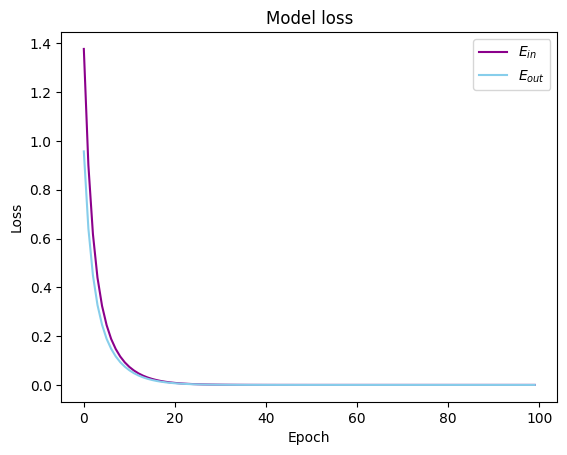

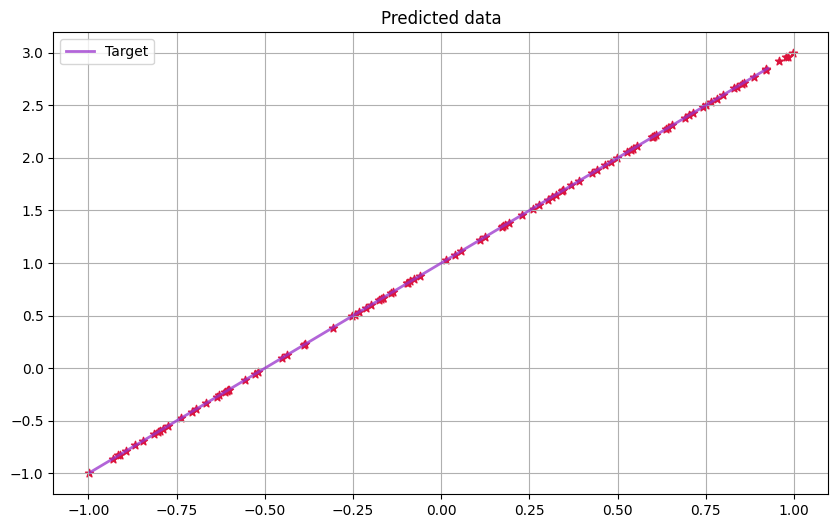

$N_{epoch}=5$, $m=0.8279553$ $b=0.7920254$

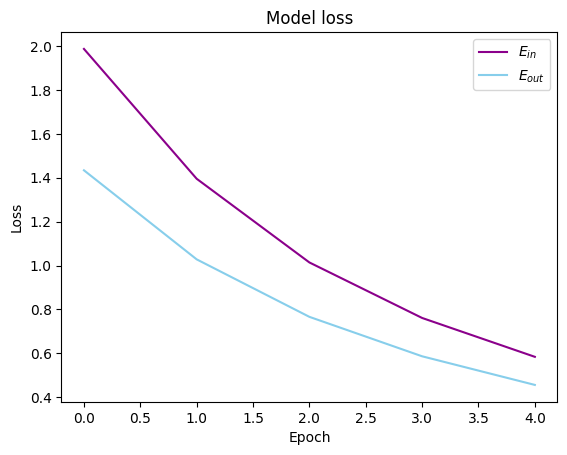

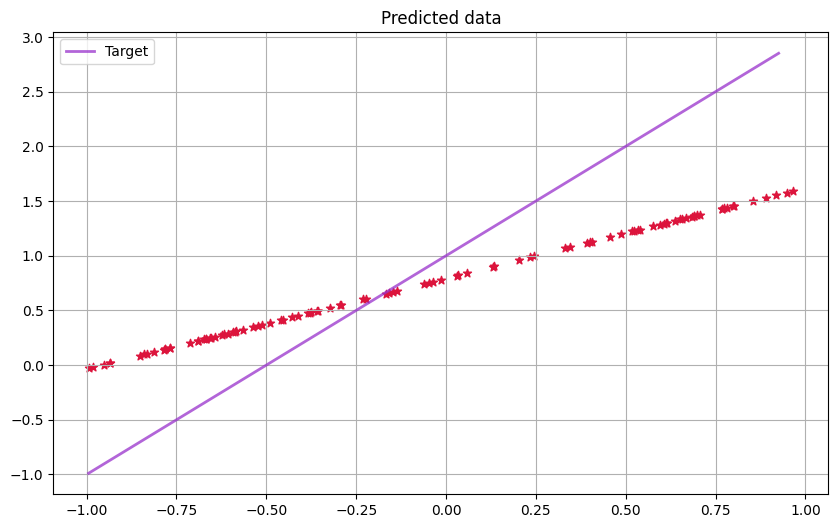

### Varying $N_{train}$ and $N_{valid}$

$N_{train}=100$, $N_{valid}=10$, $m=1.992663$, $b=1.0342482$

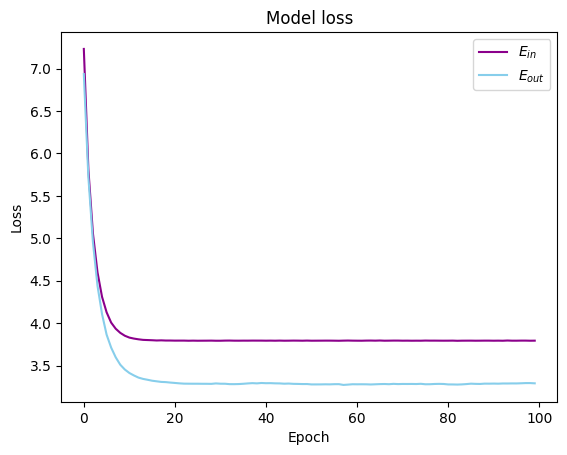

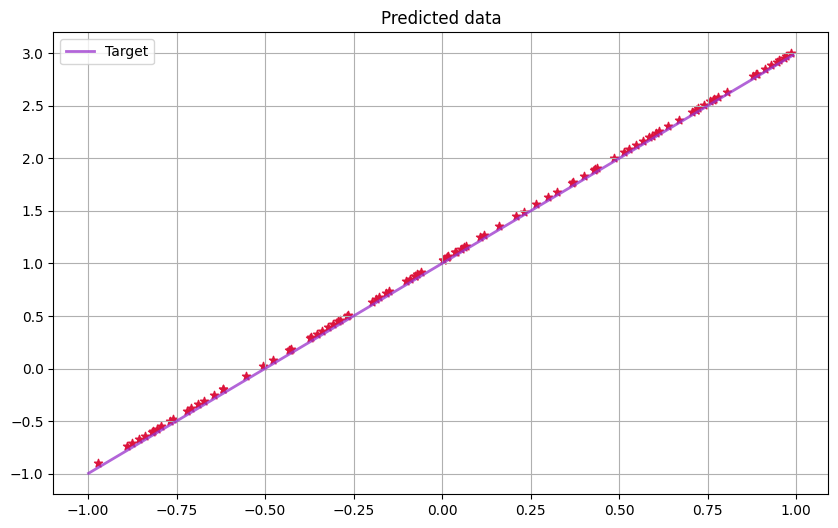

$N_{train}=3000$, $N_{valid}=300$, $m=2.0258613$, $b=0.9586808$

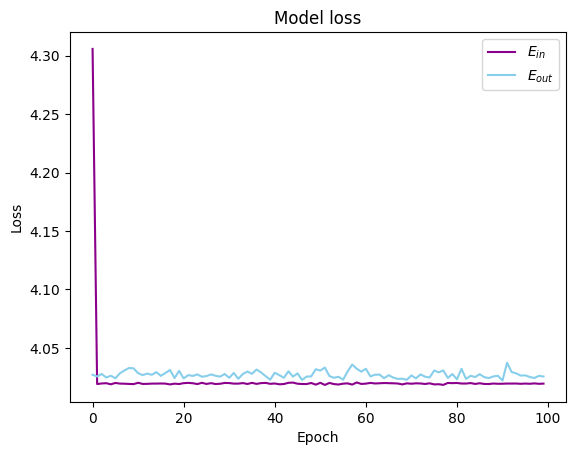

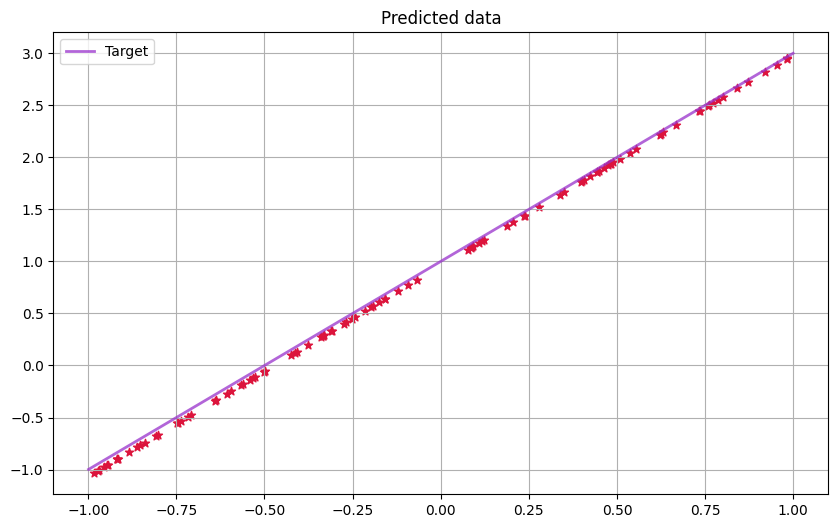


### Varying $\sigma$

$\sigma=0.01 $, $m= 2.000068$, $b= 1.0001762$

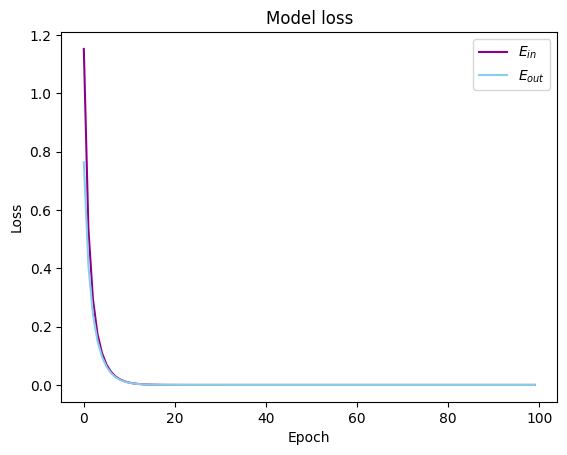

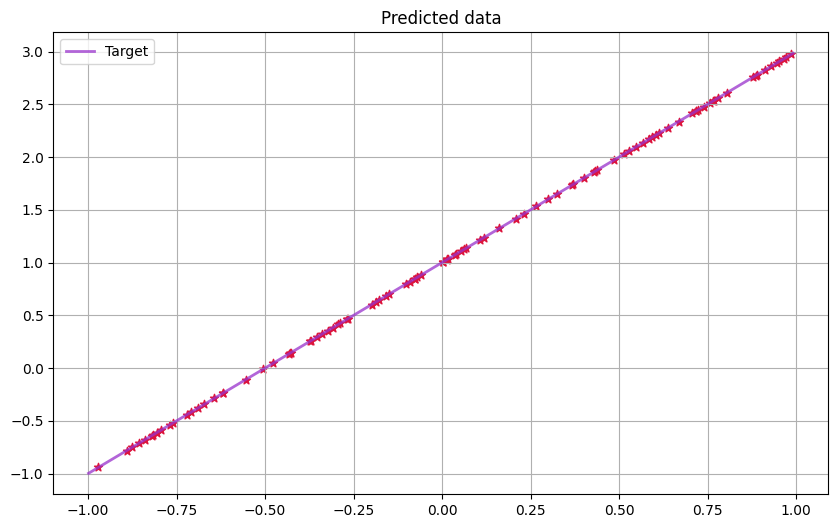

$\sigma=2.5 $, $m= 2.0417178$, $b=1.078163 $

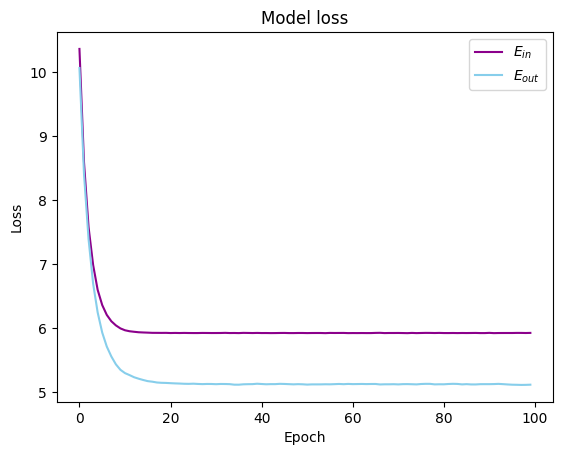

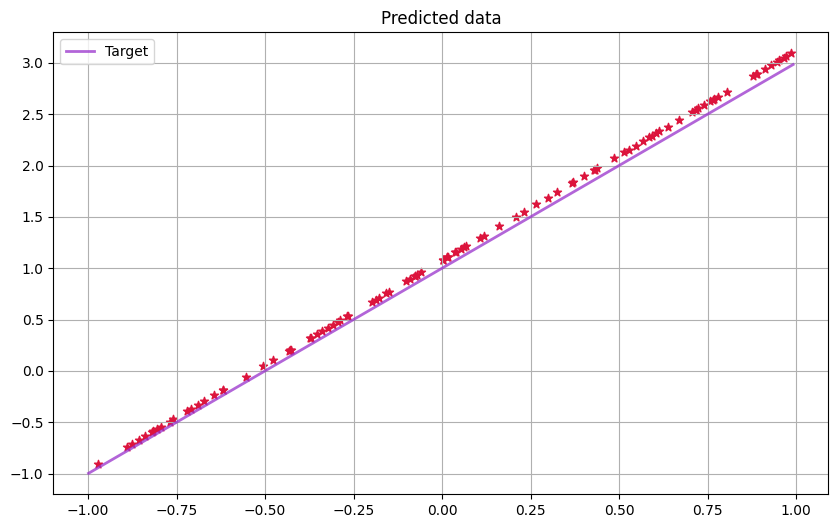

The reason why we don't always obtain good results could be the initial $\sigma=2$, as we can see the best results with the lower $\sigma$.

## 11.2 - Polynomial of order 3

We want to perform the fit of a more complex polynomial function:

$f(x)=4-3x-2x^{2}+3x^{3}$

for $x \in [-1, 1]$. 
For this purpose we have chosen $N_{epochs}=80$ , $N_{train}=5000$ , $\sigma=0.3$

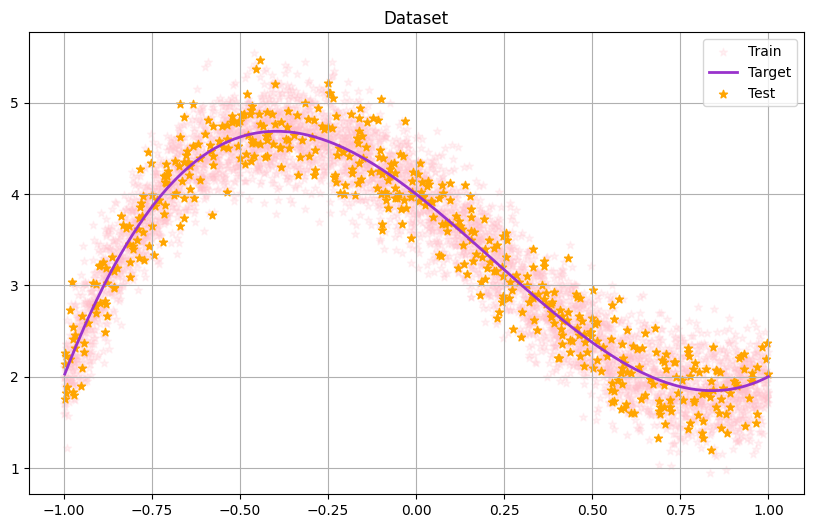

### First Option: Single Hidden Layer

For our initial approach, we considered a neural network with only one hidden layer. We varied the number of neurons in this layer, testing with 
$N=6$,$50$ and $100$. The structure of these neural networks can be represented as $1|N|1$, where:

- The first "1" represents the input layer with one neuron (for $x$)
- $N$ represents the number of neurons in the hidden layer (varying as 6, 50, or 100)
- The last "1" represents the output layer with one neuron (for $f(x)$)

Below, graphs illustrating:

1) The cost function's evolution during training
1) The model's predictions compared to the true function

These visualizations will help us assess the performance of each network configuration.

#### 1 layer and 6 neurons

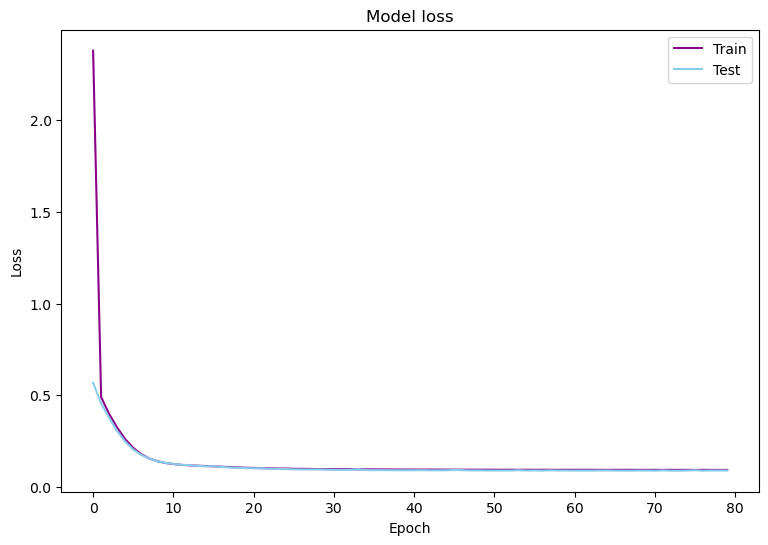

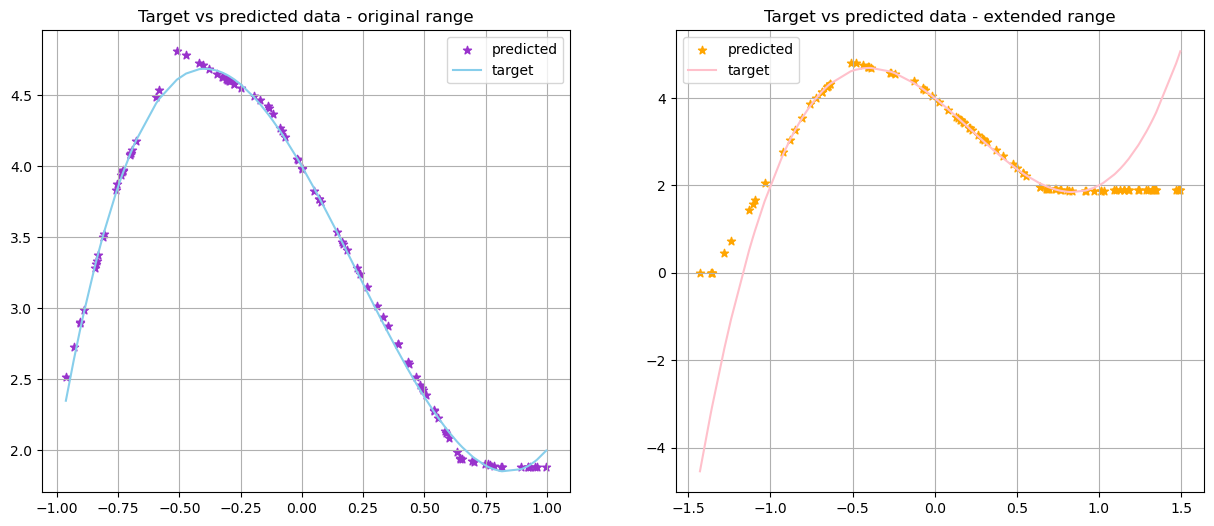

#### 1 layer and 50 neurons

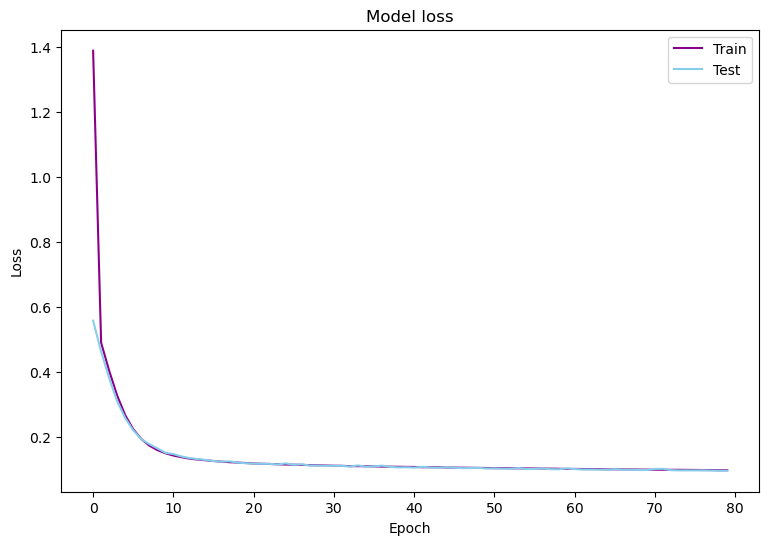

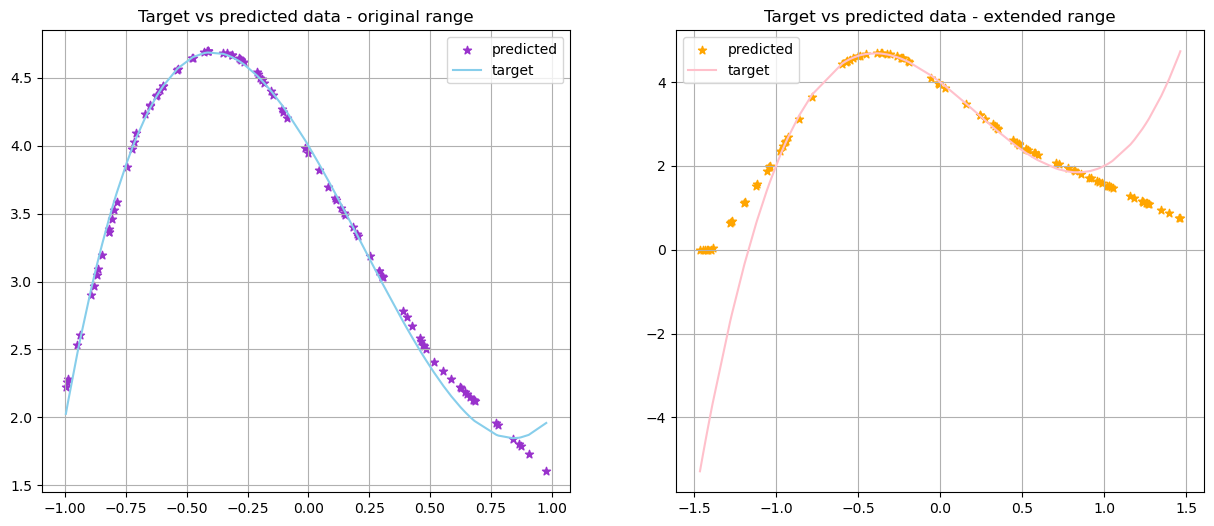

#### 1 layer and 100 neurons

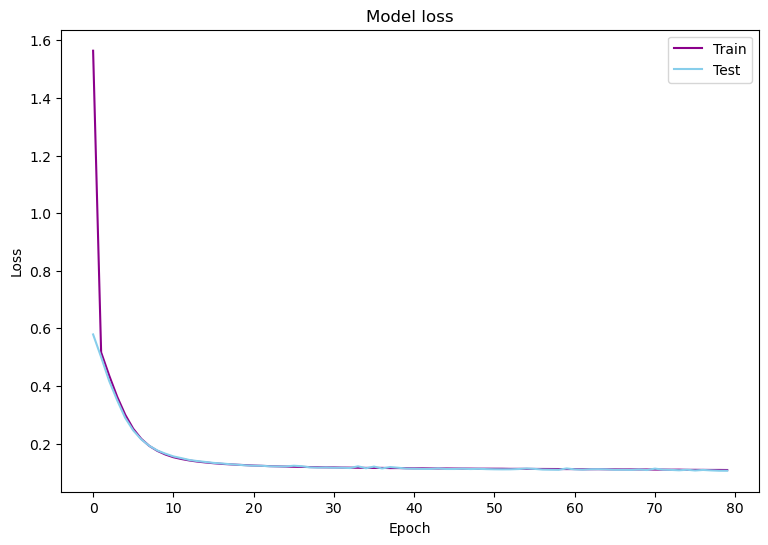

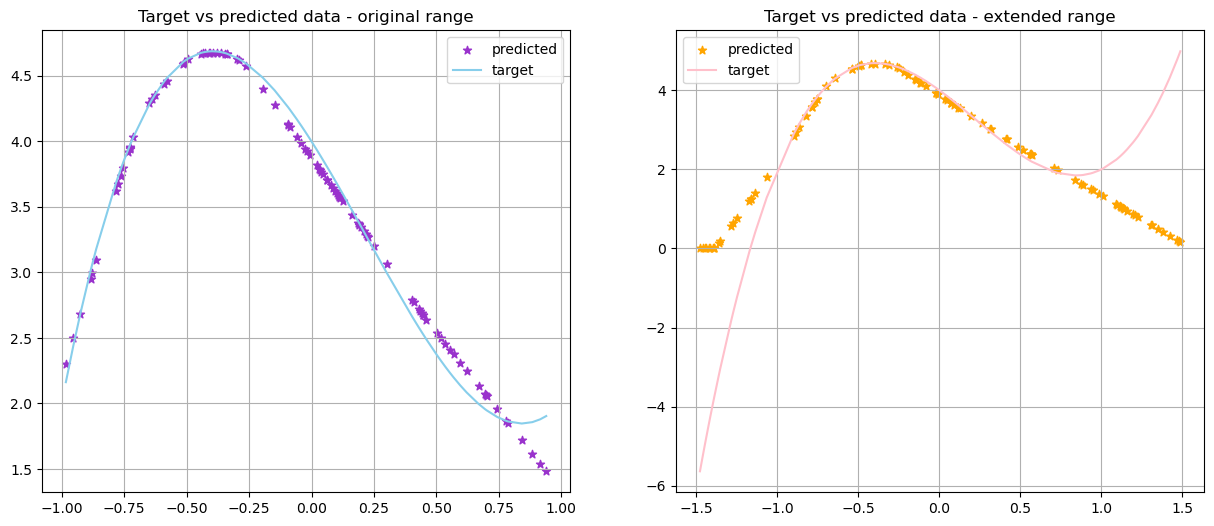


Certainly, increasing the number of neurons in a single layer improves the model's fit. However, we observed that the neural network's behavior remains quite similar when increasing from 50 to 100 neurons. Moreover, its ability to predict function values outside the original range is very limited.

### Second Option: Four Hidden Layers

For our next approach, we explore a deeper neural network architecture. This structure consists of 4 hidden layers, each containing 10 neurons. The complete architecture can be represented as:

$1|10|10|10|10|1$

This notation describes:
- An input layer with 1 neuron
- Four hidden layers, each with 10 neurons
- An output layer with 1 neuron

This deeper structure allows for more complex feature extraction and potentially better approximation of our polynomial function.

Below, we present graphs similar to those in the first option:

1) The evolution of the cost function during training
2) The model's predictions compared to the true polynomial function

These visualizations will help us assess whether this deeper architecture provides any advantages over the simpler models from our first option.

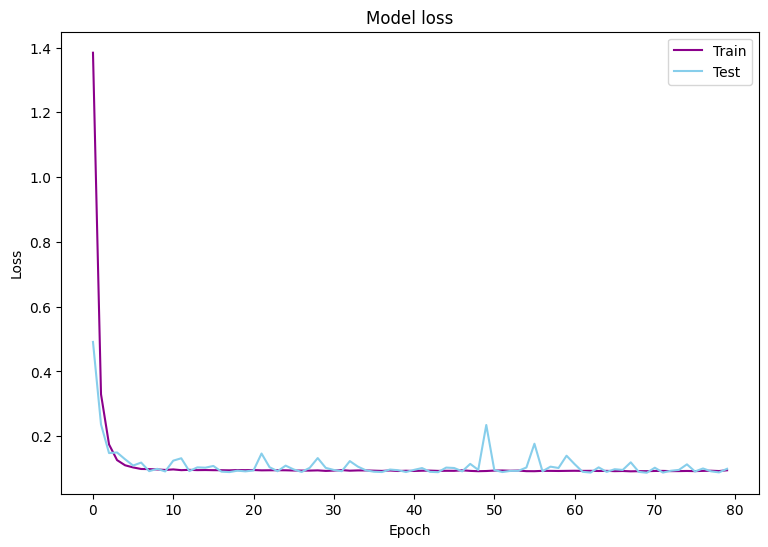

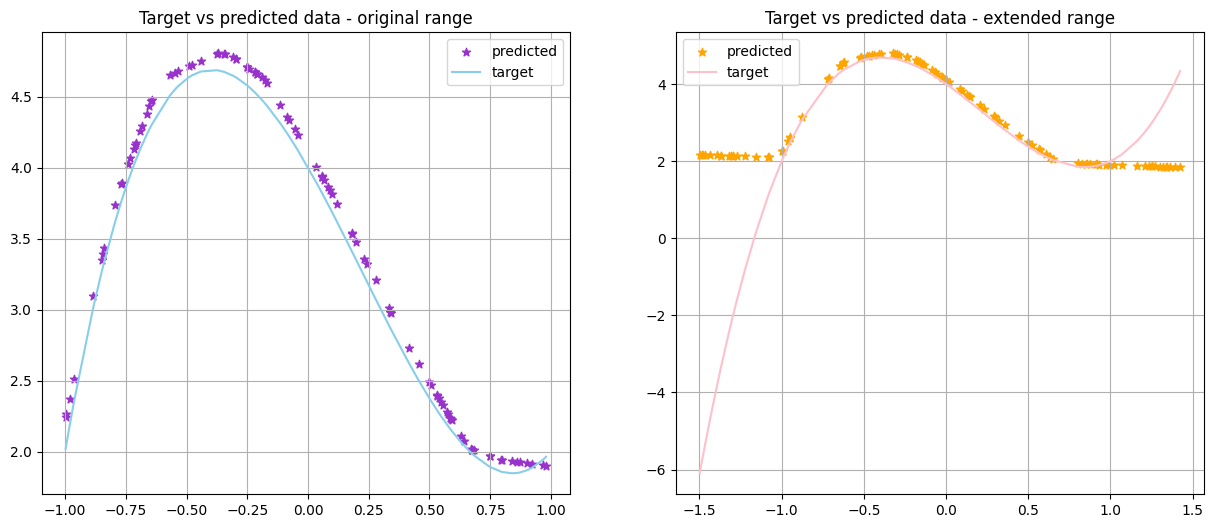

In this scenario, the model fits the data quite well, although not better than when using just one hidden layer. Also, it still faces challenges when predicting values outside the original range.

## 11.3 - Trigonometric 2D function

Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

After analyzing the results of the previous exercises, we decided to use a neural network structured with 3 hidden layers, each containing a different number of neurons. After experimenting with various configurations, we settled on the following structure: $2|35|25|20|1$. In earlier exercises, we observed that increasing the number of neurons in a layer improves the fitting. We believe that, given the complexity of the function to evaluate, using more than one hidden layer will also be beneficial. However, it is worth noting that in exercise 11.2, adding more layers did not necessarily result in better fitting. We also set $N_{epochs}= 100$ , $N_{train}=10000$ , $\sigma=0.2$.

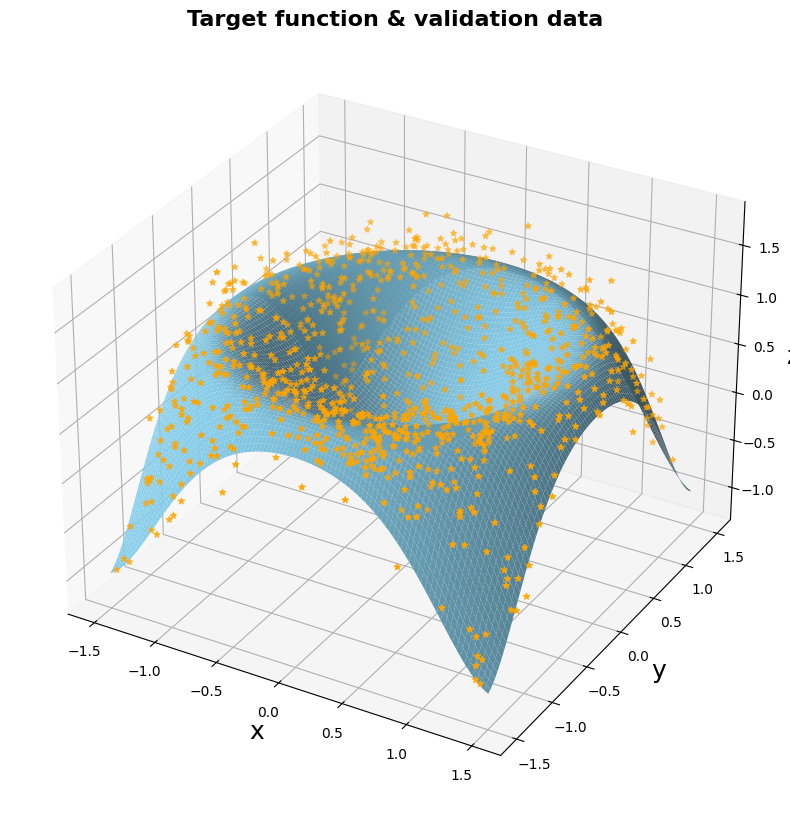

Next, we present the graphs of the cost function and the model's predictions.
We can deduce that the fit is quite good, with the exception of the points at the "corners" of the domain.

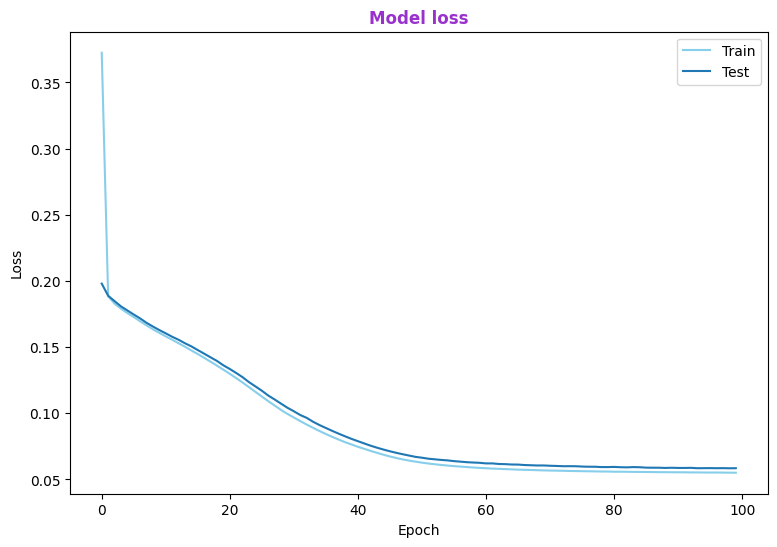

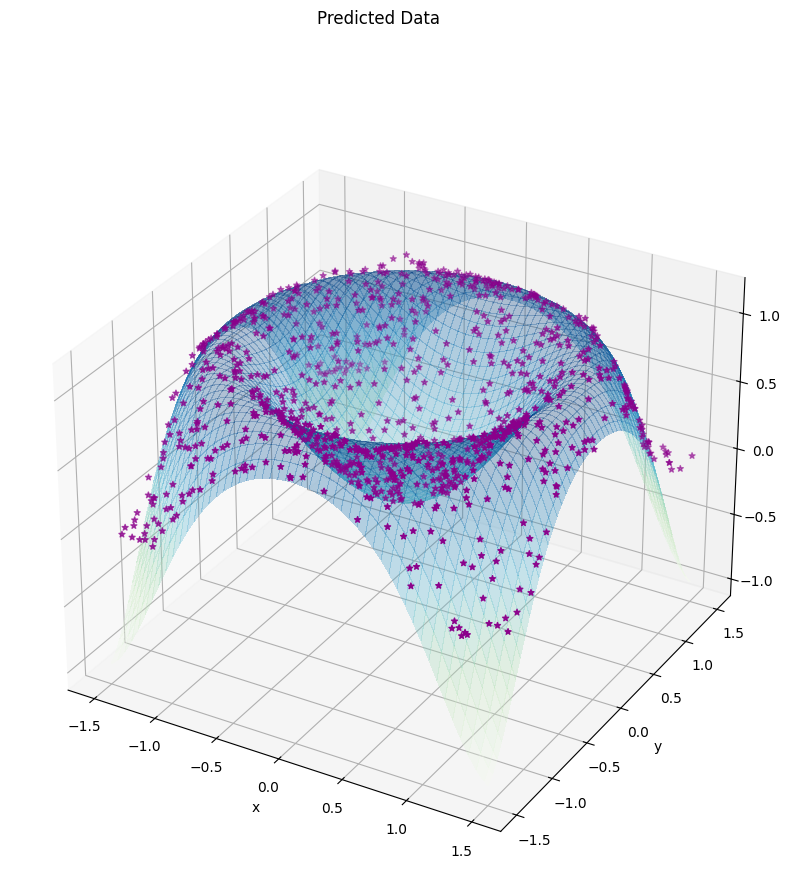

All the images and data shown in this file are obtained by running the code in exe11.1_mock.ipynb, exe11.2_mock.ipynb, exe11.3_mock.ipynb